# Assignment 3

 In this Assignment, we will use CNN to classify digits.   
The `MNIST` database is a large database of handwritten digits that is commonly used for training various image processing systems.



## Importing TensorFlow

In [240]:
import tensorflow as tf
import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical



## Get the dataset

In [241]:
# Import the dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [242]:
# Split the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_test,y_test,test_size=0.2)

In [243]:

# Pre processing 

X_train = X_train/255
X_test = X_test/255
X_train.shape



(8000, 28, 28)

## Visualize the dataset
Print some images with labels.

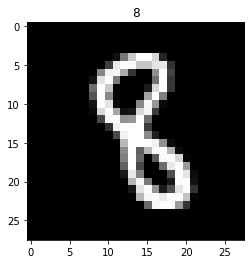

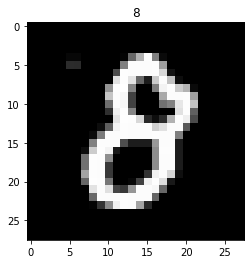

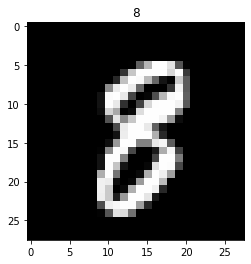

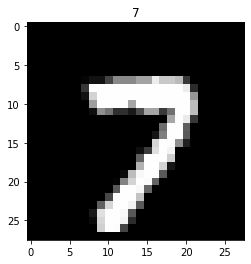

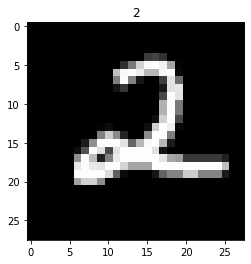

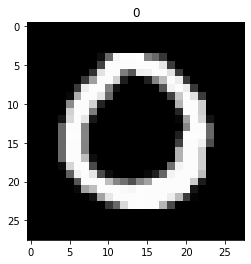

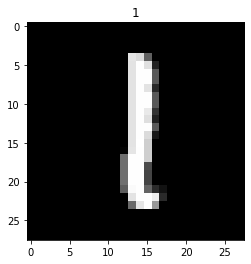

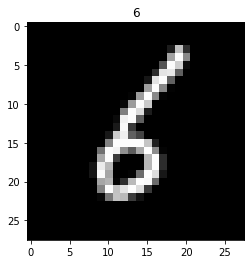

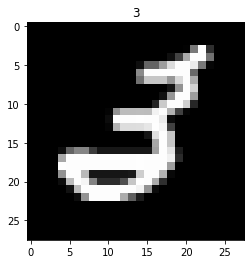

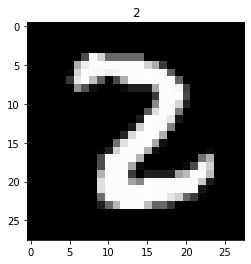

In [252]:
import matplotlib.pyplot as plt


for i in range(10):
  plt.imshow(X_train[i],cmap = 'gray')
  plt.title(Y_train[i])
  plt.show()
  # Your code
  

 



  
  



Plot statistics of the training and testing dataset  
(`x axis`: digits, `y axis`: number of samples corresponding to the digits)

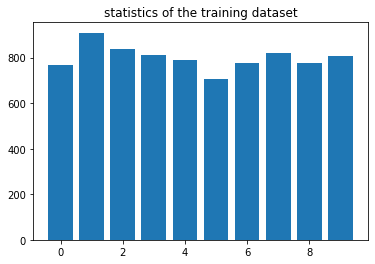

In [253]:
import numpy as np
unique , total_count = np.unique(Y_train, return_counts=True)
plt.bar(unique,total_count)
plt.title("statistics of the training dataset")
plt.show()


# Your code

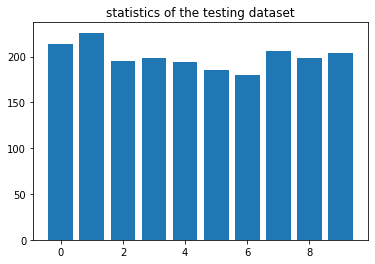

In [254]:
unique , total_count = np.unique(Y_test, return_counts=True)
plt.bar(unique,total_count)
plt.title("statistics of the testing dataset")
plt.show()


In [255]:


print(X_train.shape)
X_test.shape



(8000, 28, 28)


(2000, 28, 28)

## Model

In [256]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [257]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_32 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_14 (Flatten)        (None, 9216)              0         
                                                                 
 dense_27 (Dense)            (None, 128)               1179776   
                                                     

In [258]:
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# Compile the model (add optimizers and metrics)
 


In [259]:
history = model.fit(X_train,Y_train,epochs = 10,validation_split = 0.2)
# Fit the model on the training data (specify validation_split, read about validation if new to you)

Epoch 1/10
200/200 [==============================] - 1s 5ms/step - loss: 0.6123 - accuracy: 0.8061 - val_loss: 0.1687 - val_accuracy: 0.9494
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.2192 - accuracy: 0.9334 - val_loss: 0.1010 - val_accuracy: 0.9681
Epoch 3/10
200/200 [==============================] - 1s 4ms/step - loss: 0.1375 - accuracy: 0.9553 - val_loss: 0.0854 - val_accuracy: 0.9712
Epoch 4/10
200/200 [==============================] - 1s 4ms/step - loss: 0.1004 - accuracy: 0.9677 - val_loss: 0.0880 - val_accuracy: 0.9769
Epoch 5/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0790 - accuracy: 0.9750 - val_loss: 0.0761 - val_accuracy: 0.9769
Epoch 6/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0697 - accuracy: 0.9772 - val_loss: 0.0766 - val_accuracy: 0.9787
Epoch 7/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0573 - accuracy: 0.9823 - val_loss: 0.0761 - val_accuracy: 0.9775
Epoch 

Plot between  accuracy and validation accuracy

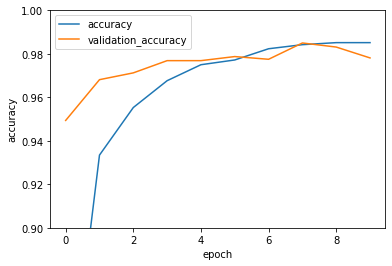

In [260]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'],label = 'validation_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.ylim([0.9,1])
plt.legend()

## Predict some images
Print the image along with its label (true value) and predicted value.

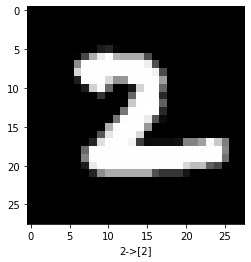

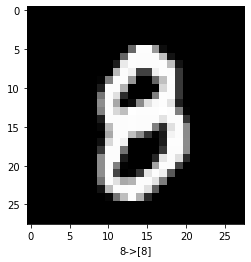

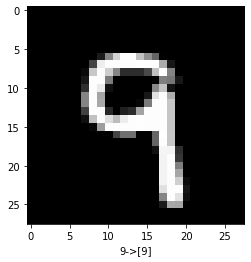

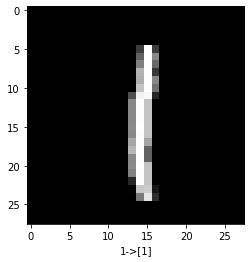

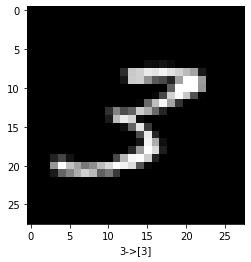

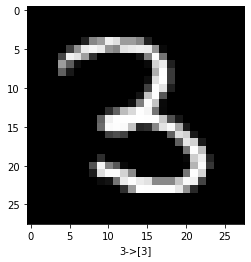

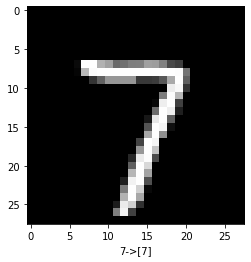

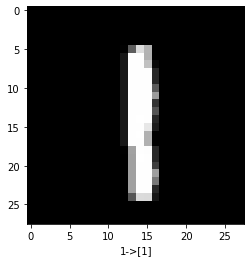

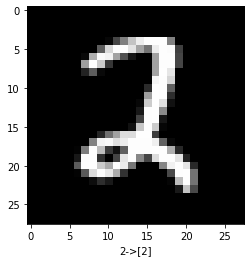

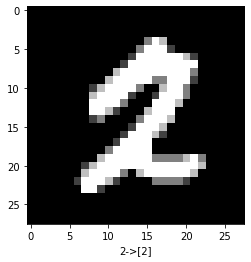

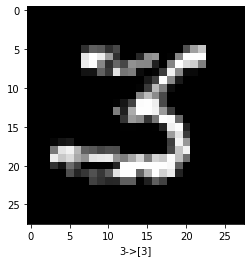

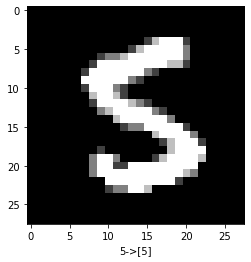

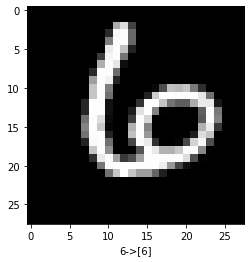

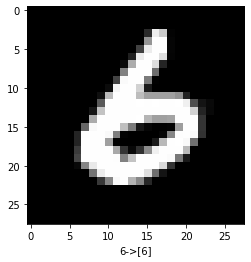

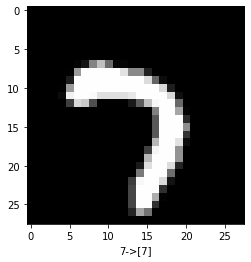

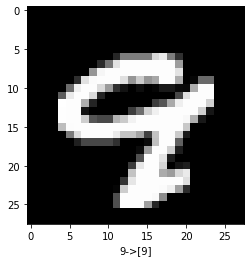

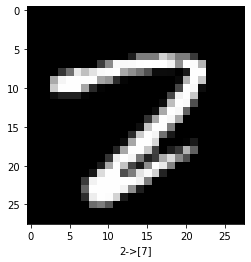

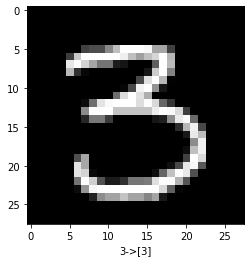

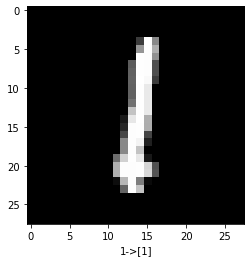

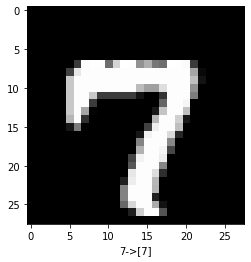

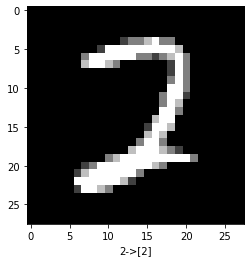

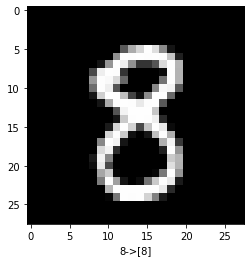

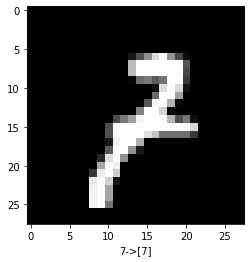

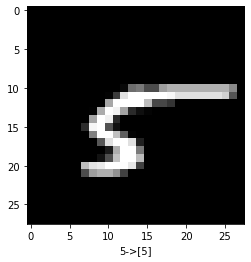

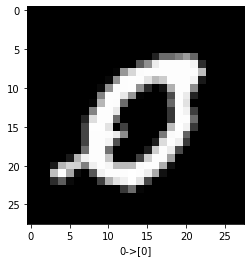

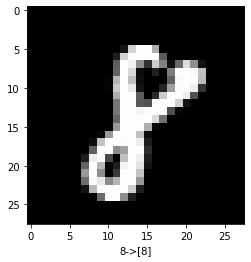

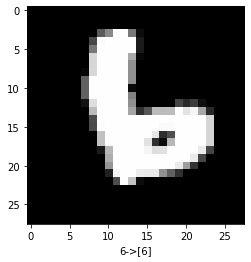

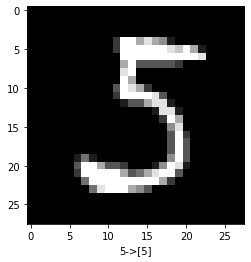

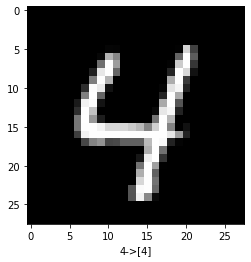

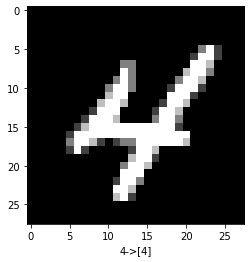

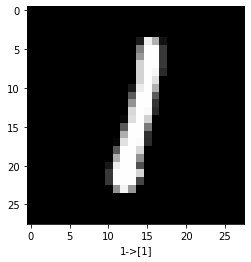

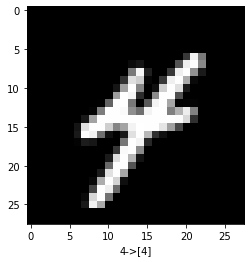

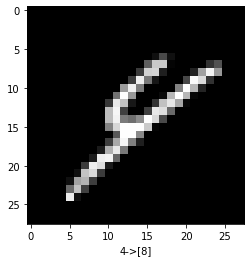

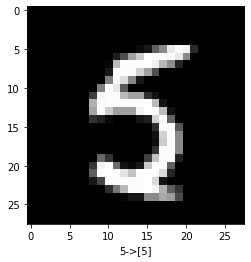

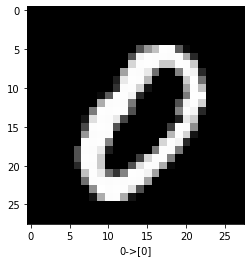

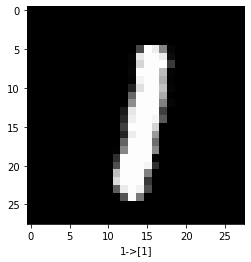

In [261]:
x=model.predict(X_test[:36])
arr=[]
for i in range(36):
  n=np.where(x[i]==max(x[i]))
  arr.append(n)

for i in range(36):
   
   
    plt.imshow(X_test[i],cmap = 'gray')
    plt.xlabel(f"{Y_test[i]}->{arr[i][0]}")
    plt.show()